In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 速度运动模型

速度运动模型（Velocity Motion Model）认为可以通过两个速度：一个旋转的和一个平移的速度，来控制机器人。驱动系统通常是通过这种方式控制的，包括差分驱动、阿克曼驱动和同步驱动。*不包括没有非完整约束的驱动系统，如万向轮（Mecanum wheels）的机器人或有腿机器人。*

用$\upsilon_t$表示$t$时刻的平移速度（Translation Velocity），用$\omega_t$表示旋转速度（Rotation Velocity）。因此，有：
$$u_t = \begin{bmatrix} \upsilon_t \\ \omega_t \end{bmatrix}$$
并规定，逆时针旋转为（向左转），$\omega_t$为正；向前运动，$\upsilon_t$为正。

## 1. 精确的运动

![](./img/velocity.jpg)
> 从$(x \quad y \quad \theta)^T$开始，并以恒定速度$\upsilon$和$\omega$运动的无噪声机器人完成的运动。

令$u_t = (\upsilon \quad \omega)^T$表示时刻$t$的控制，如果两种速度在整个时间间隔内$[t, t-1]$都是固定的值，则机器人以如下半径的圆运动：
$$r = \left| \frac {\upsilon}{\omega} \right|$$

这是任意半径为$r$圆形轨迹运动的对象在平移速度$\upsilon$和旋转速度$\omega$之间都遵循的一般关系：
$$\upsilon = \omega r$$

**注意：**机器人根本不旋转（$\omega = 0$）的情况，在这种情况下机器人沿直线运动，此时$r$为无穷大。

令$x_{t-1} = (x \, y \, \theta)^T$是机器人的初始位姿，并假定在$\Delta t$时间内保持速度$(\upsilon \, \omega)^T$恒定。很容易看出，圆的中心位于：
$$x_c = x - \frac {\upsilon}{\omega}sin \theta$$

$$y_c = y + \frac {\upsilon}{\omega}cos \theta$$

变量$(x_c \, y_c)^T$表示坐标。运动$\Delta t$时间后，理想机器人将位于$x_t = (x' \, y' \, \theta')^T$且：

$$\begin{bmatrix} x' \\ y' \\ \theta' \end{bmatrix} = 
\begin{bmatrix} 
x_c + \frac {\upsilon}{\omega} sin(\theta + \omega \Delta t) \\ 
y_c - \frac {\upsilon}{\omega} cos(\theta + \omega \Delta t) \\
\theta + \omega \Delta t
\end{bmatrix} = \begin{bmatrix} x \\ y \\ \theta \end{bmatrix} + 
\begin{bmatrix}
- \frac {\upsilon}{\omega} sin \theta + \frac {\upsilon}{\omega} sin(\theta + \omega \Delta t) \\ 
\frac {\upsilon}{\omega} cos \theta - \frac {\upsilon}{\omega} cos(\theta + \omega \Delta t) \\
\omega \Delta t
\end{bmatrix}
$$

尽管真实的机器人不能从一个速度跳到下一个速度，也不能保证在每一个时间间隔内速度保持恒定，利用很小的时间间隔$\Delta t$，在每一个时间间隔用一个常值近似真实的速度，是很常用的方法。

## 2. 真实运动

实际上，机器人的运动是受噪声的影响的。真实的速度与给定的速度是不同的。将这种不同建模成以$0$为中心的具有有限方差的随机变量。假定实际速度由下式给定：

$$
\begin{bmatrix}\hat \upsilon \\ \hat \omega \end{bmatrix} =
\begin{bmatrix}\upsilon \\ \omega \end{bmatrix} +
\begin{bmatrix}\varepsilon_{\alpha_1 \upsilon^2 + \alpha_2 \omega^2} \\
\varepsilon_{\alpha_3 \upsilon^2 + \alpha_4 \omega^2}\end{bmatrix}
$$

$\varepsilon_{\sigma^2}$是一个方差为$\sigma^2$，均值为$0$的误差变量。因此真实速度等于给定的速度加上一些小的，附加的误差（噪声）。在速度运动模型中，误差的标准偏差与给定速度成比例。参数$\alpha_1 \sim \alpha_4 \, ( \alpha_i \ge 0 , \, i = 1, 2, \cdots , 4)$是指定的机器人特定的误差参数。机器人的不确定性越大，这些参数就越大。

因此，在$x_{t-1} = (x \, y \, \theta)^T$执行完运动指令$u_t = (\upsilon \, \omega)^T$后的真实位姿$x_t = (x' \, y' \, \theta')^T$的较好模型为：

$$\begin{bmatrix} x' \\ y' \\ \theta' \end{bmatrix} = 
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix} + 
\begin{bmatrix}
- \frac {\hat \upsilon}{\hat \omega} sin \theta + \frac {\hat \upsilon}{\hat \omega} sin(\theta + \hat \omega \Delta t) \\ 
\frac {\hat \upsilon}{\hat \omega} cos \theta - \frac {\hat \upsilon}{\hat \omega} cos(\theta + \hat \omega \Delta t) \\
\hat \omega \Delta t
\end{bmatrix}
$$

但是这个模型仍然不太现实。

## 3. 最终方向

前面给出的两个方程都精确地描述了机器人真实地在一个半径为$r = \frac {\hat \upsilon}{\hat \omega}$圆形轨迹上移动时的最终位置。但是圆形运动的假设导致了重大的退化。具体来说，密度$p(x_t \, | \, u_t, x_{t-1})$的支撑集是二维的，是三维位姿中的两维。这是因为仅使用了两个噪声变量$\upsilon$和$\omega$的直接结果。

为了推广运动模型，假设机器人到达他的最终位姿时，旋转$\hat \gamma$。因此，通过下式建模最后的方向：

$$\theta' = \theta + \hat \omega \Delta t + \hat \gamma \Delta t$$

其中：

$$\hat \gamma = \varepsilon_{\alpha_5 \upsilon^2 + \alpha_6 \omega^2}$$

这里$\alpha_5$和$\alpha_6$是确定附加的旋转噪声方差的额外的特定机器人参数。因此，得到的运动模型为：

$$\begin{bmatrix} x' \\ y' \\ \theta' \end{bmatrix} = 
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix} + 
\begin{bmatrix}
- \frac {\hat \upsilon}{\hat \omega} sin \theta + \frac {\hat \upsilon}{\hat \omega} sin(\theta + \hat \omega \Delta t) \\ 
\frac {\hat \upsilon}{\hat \omega} cos \theta - \frac {\hat \upsilon}{\hat \omega} cos(\theta + \hat \omega \Delta t) \\
\hat \omega \Delta t + \hat \gamma \Delta t
\end{bmatrix}
$$

## 4. 采样函数

In [14]:
# 速度运动模型采样函数的向量版本——对粒子集进行采样
# 参数：
#   u1      - 运动控制包含两个分量：upsilon和omega
#   X0      - 粒子集
#   alpha   - 噪声系数
#   delta_t - 时间间隔
# 返回值：
#   采样后的粒子集
def sample_motion_model_velocity(u1, X0, alpha, delta_t=1):
    
    
    # 确定输入的粒子集的粒子数量
    M = X0.shape[0]
    
    # 生成随机噪声：upsilon，omega和gamma
    upsilon = np.squeeze(u1)[0]
    omega = np.squeeze(u1)[1]
    upsilon_hat = upsilon + np.random.normal(loc=0, scale=np.sqrt(alpha[0] * upsilon ** 2 + alpha[1] * omega ** 2), size=(M, 1))
    omega_hat = omega + np.random.normal(loc=0, scale=np.sqrt(alpha[2] * upsilon ** 2 + alpha[3] * omega ** 2), size=(M, 1))
    gamma_hat = np.random.normal(loc=0, scale=np.sqrt(alpha[4] * upsilon ** 2 + alpha[5] * omega ** 2), size=(M, 1))
    
    # 分解位姿的三个维度
    xs0 = X0[:,0].reshape((-1,1))
    ys0 = X0[:,1].reshape((-1,1))
    thetas0 = X0[:,2].reshape((-1,1))
    
    # 计算运动采样
    r = upsilon_hat / omega_hat
    xs1 = xs0 - r * np.sin(thetas0) + r * np.sin(thetas0 + omega_hat * delta_t)
    ys1 = ys0 + r * np.cos(thetas0) - r * np.cos(thetas0 + omega_hat * delta_t)
    thetas1 = thetas0 + omega_hat * delta_t + gamma_hat * delta_t
    
    # 堆叠粒子分量
    X1 = np.hstack([xs1, ys1, thetas1])
    
    return X1

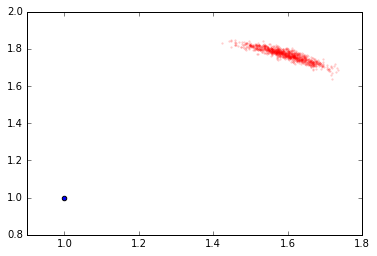

In [52]:
X = np.zeros((1000, 3)) + np.array([1, 1, np.pi/6]).reshape((1, 3))
u = np.array([1, np.pi/4])
a1 = 0.0001
a2 = 0.0001
a3 = 0.01
a4 = 0.01
a5 = 0.0001
a6 = 0.0001
alpha = [a1, a2, a3, a4, a5, a6]
X1 = sample_motion_model_velocity(u, X, alpha)

plt.scatter(X[0,0], X[0,1])
plt.scatter(X1[:,0], X1[:,1], c='r', s=5, lw=0, alpha=0.2)